In [170]:
import pandas as pd
import numpy as np

In [171]:
import nltk

In [172]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

In [173]:
import re

In [174]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [175]:
def preprocess_text(text):
    # Remove HTML tags (if any)
    text = re.sub(r"<.*?>", "", text)
    
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # print(filtered_tokens)
    # # Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # # Join the tokens back into a single string
    # processed_text = " ".join(filtered_tokens)

    
    return filtered_tokens

In [176]:
# amazon=pd.read_csv("Eco_Friendly_Products_Test_Full.xlsx - Sheet1.csv")
amazon=pd.read_csv("Amazon Reviews Validation Data_1.csv")

In [177]:
amazon

,Reviews,Aspect
0,The settings are perfect for all hair types,Adaptability
1,with lots of settings,Adaptability
2,heating element has died,Durability
3,"Also, the diffuser does not stay on at all.",Ease of Use
4,and it won't stay on it at all. Just flys off....,Ease of Use
...,...,...
1176,top no longer stays on.,Performance
1177,unfortunately one of the lids does not fit at all,Performance
1178,"cheap enough that if my husband loses one, we ...",Price
1179,economical price,Price


In [178]:
# a=amazon["Review"]
a=amazon["Reviews"]

In [179]:
q=amazon["Aspect"]

In [180]:
all_values = q.str.split(',').explode()

In [181]:
unique_values = all_values.unique()

In [182]:
len_aspect=len(unique_values)

In [183]:
len_aspect

12

In [184]:
processed_series = a.apply(preprocess_text)

In [185]:
processed_series

0                        [settings, perfect, hair, types]
1                                        [lots, settings]
2                                [heating, element, died]
3                                  [also, diffuser, stay]
4                        [wo, stay, flys, see, one, work]
                              ...                        
1176                                 [top, longer, stays]
1177                      [unfortunately, one, lids, fit]
1178        [cheap, enough, husband, loses, one, wo, cry]
1179                                  [economical, price]
1180    [also, way, seal, drinking, hole, car, hit, bu...
Name: Reviews, Length: 1181, dtype: object

In [186]:
parts_of_speech = nltk.pos_tag(processed_series[0])
parts_of_speech

[('settings', 'NNS'), ('perfect', 'VBP'), ('hair', 'NN'), ('types', 'NNS')]

In [187]:
def extract_nouns(words):
    """Extract and return nouns from a given list of words."""
    # Join the list of words into a sentence
    sentence = ' '.join(words)

    # Tokenize and POS tag the words in the sentence
    tokens = nltk.word_tokenize(sentence)
    parts_of_speech = nltk.pos_tag(tokens)

    # Extract and return words tagged as NN, NNS, NNP, or NNPS
    return [word for word, pos in parts_of_speech if pos in ['NN', 'NNS', 'NNP', 'NNPS']]


In [188]:
nouns = processed_series.apply(extract_nouns)
print(nouns)

0                               [settings, hair, types]
1                                      [lots, settings]
2                                             [element]
3                                      [diffuser, stay]
4                                                [work]
                             ...                       
1176                                            [stays]
1177                                        [lids, fit]
1178                                          [husband]
1179                                            [price]
1180    [way, drinking, hole, car, liquid, cup, holder]
Name: Reviews, Length: 1181, dtype: object


In [189]:
pip install -U textblob


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [190]:
from textblob import TextBlob

def extract_nouns_textblob(sentence):
    
    """Extract and return nouns from a given sentence using TextBlob."""
    sentence = ' '.join(sentence)
    blob = TextBlob(sentence)
    return [word for word, tag in blob.tags if tag in ["NN", "NNS", "NNP", "NNPS"]]


In [191]:
nouns_testblob = processed_series.apply(extract_nouns_textblob)
print(nouns)

0                               [settings, hair, types]
1                                      [lots, settings]
2                                             [element]
3                                      [diffuser, stay]
4                                                [work]
                             ...                       
1176                                            [stays]
1177                                        [lids, fit]
1178                                          [husband]
1179                                            [price]
1180    [way, drinking, hole, car, liquid, cup, holder]
Name: Reviews, Length: 1181, dtype: object


In [192]:
pip install -U spacy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [193]:
import spacy

In [194]:
nlpt = spacy.load("en_core_web_sm")

In [195]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [196]:
def extract_nouns_spacy(sentence):
    """Extract and return nouns from a given sentence using spaCy."""
    sentence = ' '.join(sentence)
    doc = nlpt(sentence)
    return [token.text for token in doc if token.pos_ in ["NOUN"]]

In [197]:
doc = processed_series.apply(extract_nouns_spacy)
doc

0                                 [settings, hair, types]
1                                        [lots, settings]
2                                      [heating, element]
3                                              [diffuser]
4                                            [flys, work]
                              ...                        
1176                                                [top]
1177                                          [lids, fit]
1178                                            [husband]
1179                                              [price]
1180    [way, seal, drinking, hole, car, bump, stop, l...
Name: Reviews, Length: 1181, dtype: object

In [198]:
doc[1180]

['way',
 'seal',
 'drinking',
 'hole',
 'car',
 'bump',
 'stop',
 'liquid',
 'cup',
 'holder']

In [199]:
def load_glove_model(glove_file):
    """Load the GloVe model from a file."""
    print("Loading GloVe Model")
    with open(glove_file, 'r') as file:
        model = {}
        for line in file:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            model[word] = embedding
        print("Done. {} words loaded!".format(len(model)))
    return model

glove_model = load_glove_model("/Users/divyamsobti/Downloads/glove.6B/glove.6B.100d.txt")


Loading GloVe Model
Done. 400000 words loaded!


In [200]:
sentences_testblob=np.array(nouns_testblob)


In [201]:
sentences_spacy=np.array(doc)

In [202]:
sentences_nltk=np.array(nouns)

In [203]:
sentences=np.array(processed_series)

In [204]:
def sentence_vector(word_list, model, vector_size=100):
    """Generate a sentence vector by averaging the word vectors."""
    word_vectors = [model[word] for word in word_list if word in model]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(word_vectors, axis=0)




In [205]:
# Usage
sentence_vectors = np.array([sentence_vector(sentence, glove_model) for sentence in sentences])

In [206]:
sentence_vectors_testblob = np.array([sentence_vector(sentence, glove_model) for sentence in sentences_testblob])

In [207]:
sentence_vectors_spacy = np.array([sentence_vector(sentence, glove_model) for sentence in sentences_spacy])

In [208]:
sentence_vectors_nltk = np.array([sentence_vector(sentence, glove_model) for sentence in sentences_nltk])

# Cluster for 12 aspects

In [209]:
from sklearn.cluster import KMeans

num_clusters = len_aspect  # Example number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(sentence_vectors)
labels = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [210]:
num_clusters = len_aspect  # Example number of clusters
kmeans_textblob = KMeans(n_clusters=num_clusters)
kmeans_textblob.fit(sentence_vectors_testblob)
labels_textblob = kmeans_textblob.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [211]:
kmeans_spacy = KMeans(n_clusters=num_clusters)
kmeans_spacy.fit(sentence_vectors_spacy)
labels_spacy = kmeans_spacy.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [212]:
kmeans_nltk = KMeans(n_clusters=num_clusters)
kmeans_nltk.fit(sentence_vectors_nltk)
labels_nltk = kmeans_nltk.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# ploting

In [213]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

In [214]:
from sklearn.manifold import TSNE

perplexity_value = min(30, len(sentence_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors)

In [215]:
import plotly.graph_objects as go
import plotly.io as pio

fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(normal)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [216]:
import plotly.graph_objects as go

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Normal)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## textblobl

In [217]:
perplexity_value = min(30, len(sentence_vectors_testblob) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_testblob)

In [218]:


fig = go.Figure()

for i in range(num_clusters):
    indices = labels_textblob == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(Textblob)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [219]:

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_testblob) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_testblob)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels_textblob == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Textblob)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## spacy

In [220]:
perplexity_value = min(30, len(sentence_vectors_spacy) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_spacy)

In [221]:
fig = go.Figure()


for i in range(num_clusters):
    indices = labels_spacy == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(Spacy)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [222]:
# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_spacy) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_spacy)

fig = go.Figure()

for i in range(num_clusters):
    indices = labels_spacy == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Spacy)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## NLTK


In [223]:
perplexity_value = min(30, len(sentence_vectors_nltk) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_nltk)

In [224]:
fig = go.Figure()
for i in range(num_clusters):
    indices = labels_nltk == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(NLTK)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)

In [225]:
# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_nltk) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_nltk)

fig = go.Figure()

for i in range(num_clusters):
    indices = labels_nltk == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(NLTK)',
                    scene=dict(xaxis_title='t-SNE Dimension 1',
                                 yaxis_title='t-SNE Dimension 2',
                                 zaxis_title='t-SNE Dimension 3'))
fig.show()


# kmeans with 6 aspects

In [226]:
num_clusters = 6 # Example number of clusters

In [227]:

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(sentence_vectors)
labels = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [228]:
kmeans_textblob = KMeans(n_clusters=num_clusters)
kmeans_textblob.fit(sentence_vectors_testblob)
labels_textblob = kmeans_textblob.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [229]:
kmeans_spacy = KMeans(n_clusters=num_clusters)
kmeans_spacy.fit(sentence_vectors_spacy)
labels_spacy = kmeans_spacy.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [230]:
kmeans_nltk = KMeans(n_clusters=num_clusters)
kmeans_nltk.fit(sentence_vectors_nltk)
labels_nltk = kmeans_nltk.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# ploting

In [231]:
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors)

In [232]:

fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(normal)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [233]:

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Normal)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## textblobl

In [234]:
perplexity_value = min(30, len(sentence_vectors_testblob) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_testblob)

In [235]:


fig = go.Figure()

for i in range(num_clusters):
    indices = labels_textblob == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(Textblob)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [236]:

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_testblob) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_testblob)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels_textblob == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Textblob)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## spacy

In [237]:
perplexity_value = min(30, len(sentence_vectors_spacy) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_spacy)

In [238]:
fig = go.Figure()


for i in range(num_clusters):
    indices = labels_spacy == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(Spacy)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [239]:
# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_spacy) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_spacy)

fig = go.Figure()

for i in range(num_clusters):
    indices = labels_spacy == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Spacy)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## NLTK


In [240]:
perplexity_value = min(30, len(sentence_vectors_nltk) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_nltk)

In [241]:
fig = go.Figure()
for i in range(num_clusters):
    indices = labels_nltk == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(NLTK)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)

In [242]:
# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_nltk) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_nltk)

fig = go.Figure()

for i in range(num_clusters):
    indices = labels_nltk == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(NLTK)',
                    scene=dict(xaxis_title='t-SNE Dimension 1',
                                 yaxis_title='t-SNE Dimension 2',
                                 zaxis_title='t-SNE Dimension 3'))
fig.show()


# df

In [243]:
# Create DataFrame
df_spacy = pd.DataFrame({
    'Sentence': doc,
    'Cluster': labels_spacy
})

# Show the DataFrame
print(df_spacy)

                                               Sentence  Cluster
0                               [settings, hair, types]        5
1                                      [lots, settings]        5
2                                    [heating, element]        5
3                                            [diffuser]        1
4                                          [flys, work]        0
...                                                 ...      ...
1176                                              [top]        0
1177                                        [lids, fit]        4
1178                                          [husband]        0
1179                                            [price]        3
1180  [way, seal, drinking, hole, car, bump, stop, l...        0

[1181 rows x 2 columns]


In [244]:
# Create DataFrame
df = pd.DataFrame({
    'Sentence': sentences,
    'Cluster': labels
})

# Show the DataFrame
print(df)

                                               Sentence  Cluster
0                      [settings, perfect, hair, types]        3
1                                      [lots, settings]        3
2                              [heating, element, died]        3
3                                [also, diffuser, stay]        3
4                      [wo, stay, flys, see, one, work]        5
...                                                 ...      ...
1176                               [top, longer, stays]        5
1177                    [unfortunately, one, lids, fit]        3
1178      [cheap, enough, husband, loses, one, wo, cry]        5
1179                                [economical, price]        2
1180  [also, way, seal, drinking, hole, car, hit, bu...        3

[1181 rows x 2 columns]


In [245]:
# Create DataFrame
df_textblob = pd.DataFrame({
    'Sentence': sentences_testblob,
    'Cluster': labels_textblob
})

# Show the DataFrame
print(df_textblob)

                                             Sentence  Cluster
0                             [settings, hair, types]        1
1                                    [lots, settings]        2
2                                           [element]        5
3                                    [diffuser, stay]        0
4                                              [work]        3
...                                               ...      ...
1176                                          [stays]        5
1177                                      [lids, fit]        2
1178                                        [husband]        5
1179                                          [price]        4
1180  [way, drinking, hole, car, liquid, cup, holder]        5

[1181 rows x 2 columns]


In [246]:
# Create DataFrame
df_nltk = pd.DataFrame({
    'Sentence': sentences_nltk,
    'Cluster': labels_nltk
})

# Show the DataFrame
print(df_nltk)

                                             Sentence  Cluster
0                             [settings, hair, types]        5
1                                    [lots, settings]        5
2                                           [element]        4
3                                    [diffuser, stay]        0
4                                              [work]        2
...                                               ...      ...
1176                                          [stays]        1
1177                                      [lids, fit]        1
1178                                        [husband]        4
1179                                          [price]        3
1180  [way, drinking, hole, car, liquid, cup, holder]        1

[1181 rows x 2 columns]


# GMM

In [247]:
from sklearn.mixture import GaussianMixture

In [248]:
gmm = GaussianMixture(n_components = 12)

In [249]:
gmm_6 = GaussianMixture(n_components = 6)

In [250]:
gmm.fit(sentence_vectors)

GaussianMixture(n_components=12)

In [251]:
labels = gmm.predict(sentence_vectors)

In [252]:
gmm.fit(sentence_vectors_nltk)
labels_nltk = gmm.predict(sentence_vectors_nltk)

In [253]:
gmm.fit(sentence_vectors_spacy)
labels_spacy = gmm.predict(sentence_vectors_spacy)

In [254]:
gmm.fit(sentence_vectors_testblob)
labels_textblob = gmm.predict(sentence_vectors_testblob)

# ploting

In [255]:
num_clusters=12

In [256]:


perplexity_value = min(30, len(sentence_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors)

In [257]:

fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(normal)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [258]:
import plotly.graph_objects as go

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Normal)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## textblobl

In [259]:
perplexity_value = min(30, len(sentence_vectors_testblob) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_testblob)

In [260]:


fig = go.Figure()

for i in range(num_clusters):
    indices = labels_textblob == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(Textblob)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [261]:

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_testblob) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_testblob)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels_textblob == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Textblob)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## spacy

In [262]:
perplexity_value = min(30, len(sentence_vectors_spacy) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_spacy)

In [263]:
fig = go.Figure()


for i in range(num_clusters):
    indices = labels_spacy == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(Spacy)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [264]:
# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_spacy) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_spacy)

fig = go.Figure()

for i in range(num_clusters):
    indices = labels_spacy == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Spacy)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## NLTK


In [265]:
perplexity_value = min(30, len(sentence_vectors_nltk) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_nltk)

In [266]:
fig = go.Figure()
for i in range(num_clusters):
    indices = labels_nltk == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(NLTK)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)

In [267]:
# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_nltk) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_nltk)

fig = go.Figure()

for i in range(num_clusters):
    indices = labels_nltk == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(NLTK)',
                    scene=dict(xaxis_title='t-SNE Dimension 1',
                                 yaxis_title='t-SNE Dimension 2',
                                 zaxis_title='t-SNE Dimension 3'))
fig.show()


# df

In [268]:
# Create DataFrame
df_spacy = pd.DataFrame({
    'Sentence': doc,
    'Cluster': labels_spacy
})

# Show the DataFrame
print(df_spacy)

                                               Sentence  Cluster
0                               [settings, hair, types]        1
1                                      [lots, settings]        1
2                                    [heating, element]        6
3                                            [diffuser]        0
4                                          [flys, work]        6
...                                                 ...      ...
1176                                              [top]        3
1177                                        [lids, fit]        6
1178                                          [husband]        3
1179                                            [price]        2
1180  [way, seal, drinking, hole, car, bump, stop, l...        6

[1181 rows x 2 columns]


In [269]:
# Create DataFrame
df = pd.DataFrame({
    'Sentence': sentences,
    'Cluster': labels
})

# Show the DataFrame
print(df)

                                               Sentence  Cluster
0                      [settings, perfect, hair, types]        6
1                                      [lots, settings]        5
2                              [heating, element, died]        5
3                                [also, diffuser, stay]       10
4                      [wo, stay, flys, see, one, work]       10
...                                                 ...      ...
1176                               [top, longer, stays]       10
1177                    [unfortunately, one, lids, fit]        5
1178      [cheap, enough, husband, loses, one, wo, cry]       11
1179                                [economical, price]        4
1180  [also, way, seal, drinking, hole, car, hit, bu...       10

[1181 rows x 2 columns]


In [270]:
# Create DataFrame
df_textblob = pd.DataFrame({
    'Sentence': sentences_testblob,
    'Cluster': labels_textblob
})

# Show the DataFrame
print(df_textblob)

                                             Sentence  Cluster
0                             [settings, hair, types]        8
1                                    [lots, settings]        7
2                                           [element]        7
3                                    [diffuser, stay]        7
4                                              [work]        0
...                                               ...      ...
1176                                          [stays]        7
1177                                      [lids, fit]        5
1178                                        [husband]        4
1179                                          [price]       11
1180  [way, drinking, hole, car, liquid, cup, holder]        7

[1181 rows x 2 columns]


In [271]:
# Create DataFrame
df_nltk = pd.DataFrame({
    'Sentence': sentences_nltk,
    'Cluster': labels_nltk
})

# Show the DataFrame
print(df_nltk)

                                             Sentence  Cluster
0                             [settings, hair, types]        5
1                                    [lots, settings]       11
2                                           [element]       11
3                                    [diffuser, stay]        9
4                                              [work]       10
...                                               ...      ...
1176                                          [stays]        9
1177                                      [lids, fit]        1
1178                                        [husband]        9
1179                                          [price]        4
1180  [way, drinking, hole, car, liquid, cup, holder]        9

[1181 rows x 2 columns]


# 6 cluster

In [275]:
gmm_6.fit(sentence_vectors_nltk)
labels_nltk = gmm_6.predict(sentence_vectors_nltk)

In [276]:
gmm_6.fit(sentence_vectors)
labels = gmm_6.predict(sentence_vectors)

In [277]:
gmm_6.fit(sentence_vectors_spacy)
labels_spacy = gmm_6.predict(sentence_vectors_spacy)

In [278]:
gmm_6.fit(sentence_vectors_testblob )
labels_textblob = gmm_6.predict(sentence_vectors_testblob)

In [279]:
num_clusters=6

In [280]:


perplexity_value = min(30, len(sentence_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors)

In [281]:

fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(normal)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [282]:
import plotly.graph_objects as go

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Normal)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## textblobl

In [283]:
perplexity_value = min(30, len(sentence_vectors_testblob) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_testblob)

In [284]:


fig = go.Figure()

for i in range(num_clusters):
    indices = labels_textblob == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(Textblob)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [285]:

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_testblob) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_testblob)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels_textblob == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Textblob)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## spacy

In [286]:
perplexity_value = min(30, len(sentence_vectors_spacy) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_spacy)

In [287]:
fig = go.Figure()


for i in range(num_clusters):
    indices = labels_spacy == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(Spacy)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [288]:
# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_spacy) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_spacy)

fig = go.Figure()

for i in range(num_clusters):
    indices = labels_spacy == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(Spacy)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


## NLTK


In [289]:
perplexity_value = min(30, len(sentence_vectors_nltk) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors_nltk)

In [290]:
fig = go.Figure()
for i in range(num_clusters):
    indices = labels_nltk == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(NLTK)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)

In [291]:
# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors_nltk) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors_nltk)

fig = go.Figure()

for i in range(num_clusters):
    indices = labels_nltk == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(NLTK)',
                    scene=dict(xaxis_title='t-SNE Dimension 1',
                                 yaxis_title='t-SNE Dimension 2',
                                 zaxis_title='t-SNE Dimension 3'))
fig.show()


# df

In [292]:
# Create DataFrame
df_spacy = pd.DataFrame({
    'Sentence': doc,
    'Cluster': labels_spacy
})

# Show the DataFrame
print(df_spacy)

                                               Sentence  Cluster
0                               [settings, hair, types]        3
1                                      [lots, settings]        3
2                                    [heating, element]        4
3                                            [diffuser]        1
4                                          [flys, work]        1
...                                                 ...      ...
1176                                              [top]        5
1177                                        [lids, fit]        0
1178                                          [husband]        5
1179                                            [price]        2
1180  [way, seal, drinking, hole, car, bump, stop, l...        4

[1181 rows x 2 columns]


In [293]:
# Create DataFrame
df = pd.DataFrame({
    'Sentence': sentences,
    'Cluster': labels
})

# Show the DataFrame
print(df)

                                               Sentence  Cluster
0                      [settings, perfect, hair, types]        3
1                                      [lots, settings]        3
2                              [heating, element, died]        3
3                                [also, diffuser, stay]        3
4                      [wo, stay, flys, see, one, work]        1
...                                                 ...      ...
1176                               [top, longer, stays]        1
1177                    [unfortunately, one, lids, fit]        3
1178      [cheap, enough, husband, loses, one, wo, cry]        1
1179                                [economical, price]        1
1180  [also, way, seal, drinking, hole, car, hit, bu...        1

[1181 rows x 2 columns]


In [294]:
# Create DataFrame
df_textblob = pd.DataFrame({
    'Sentence': sentences_testblob,
    'Cluster': labels_textblob
})

# Show the DataFrame
print(df_textblob)

                                             Sentence  Cluster
0                             [settings, hair, types]        3
1                                    [lots, settings]        3
2                                           [element]        3
3                                    [diffuser, stay]        1
4                                              [work]        3
...                                               ...      ...
1176                                          [stays]        4
1177                                      [lids, fit]        2
1178                                        [husband]        4
1179                                          [price]        3
1180  [way, drinking, hole, car, liquid, cup, holder]        4

[1181 rows x 2 columns]


In [295]:
# Create DataFrame
df_nltk = pd.DataFrame({
    'Sentence': sentences_nltk,
    'Cluster': labels_nltk
})

# Show the DataFrame
print(df_nltk)

                                             Sentence  Cluster
0                             [settings, hair, types]        0
1                                    [lots, settings]        5
2                                           [element]        5
3                                    [diffuser, stay]        5
4                                              [work]        2
...                                               ...      ...
1176                                          [stays]        5
1177                                      [lids, fit]        0
1178                                        [husband]        5
1179                                          [price]        4
1180  [way, drinking, hole, car, liquid, cup, holder]        5

[1181 rows x 2 columns]


Best GMM for Glove Vectors: GaussianMixture(n_components=24, random_state=0)
Summary: Means - [[-0.27546421  0.35486949  0.07829089 ... -0.26755378  0.46551596
   0.42546342]
 [-0.39567123  0.36806683 -0.177349   ... -0.6049455   0.56226833
   0.4986495 ]
 [-0.28429642  0.15236319  0.21105757 ... -0.30014392  0.44326714
   0.08509591]
 ...
 [-0.13653841  0.45425465  0.08802568 ... -0.55587522  0.34381453
   0.43008256]
 [-0.32697329  0.35610608  0.18443218 ... -0.22645086  0.57422555
   0.14111837]
 [-0.36228617  0.18123137  0.50470527 ... -0.07371103  0.51523233
   0.19789742]], Covariances - [[[ 0.0986587   0.01627082 -0.01711073 ... -0.03445385 -0.00261897
    0.03512542]
  [ 0.01627082  0.04020374 -0.00102321 ... -0.05628546 -0.01508277
    0.03769108]
  [-0.01711073 -0.00102321  0.06017456 ...  0.01636906 -0.01556848
   -0.00025364]
  ...
  [-0.03445385 -0.05628546  0.01636906 ...  0.12871746  0.03311672
   -0.07185517]
  [-0.00261897 -0.01508277 -0.01556848 ...  0.03311672  0.027

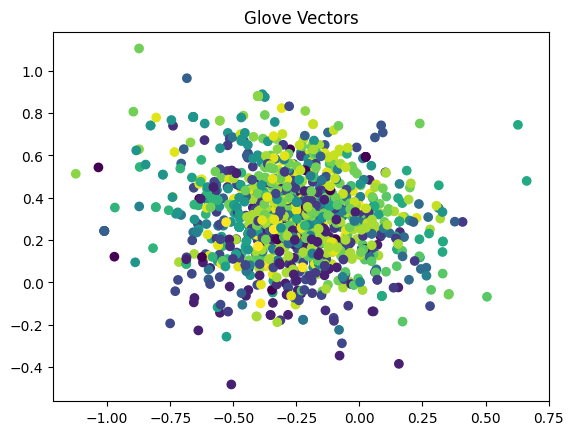

In [296]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming glove_vector and word_vectors are NumPy arrays
# Replace these with your actual data
glove_vector = sentence_vectors

# Function to fit the model and plot results
def fit_and_plot(data, title):
    best_gmm = None
    best_score = float('-inf')
    for n_components in range(3, 25):
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
        gmm.fit(data)
        score = gmm.bic(data)
        if score > best_score:
            best_score = score
            best_gmm = gmm

    print(f'Best GMM for {title}: {best_gmm}')
    print(f'Summary: Means - {best_gmm.means_}, Covariances - {best_gmm.covariances_}')

    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=best_gmm.predict(data))
    plt.title(title)
    plt.show()

# Fit and plot for glove_vector and word_vectors
fit_and_plot(glove_vector, 'Glove Vectors')



Best GMM for Glove Vectors: GaussianMixture(n_components=12, random_state=0)
Summary: Means - [[-0.30466952  0.53065594 -0.27100758 ... -0.20989586  0.5671447
   0.42849883]
 [ 0.04414505  0.27148845  0.33051107 ... -0.5636705   0.55762845
   0.40594436]
 [-0.13943376  0.26222624  0.14024199 ... -0.1737206   0.52234248
   0.10333197]
 ...
 [-0.47135806  0.3805709   0.0472056  ... -0.21401808 -0.14725778
   0.25753178]
 [-0.19607808  0.41373314  0.27783228 ... -0.48850497 -0.09246009
   0.41102808]
 [-0.29768264  0.27844605  0.16228681 ... -0.2589669   0.49797771
   0.16390253]], Covariances - [[[ 1.09494421e-02 -1.73907879e-02  1.02645548e-02 ...  2.89889284e-02
    4.91383027e-03  2.08785079e-03]
  [-1.73907879e-02  6.97513342e-02 -3.68113341e-02 ... -1.24277869e-01
   -3.82177929e-02  1.35891337e-02]
  [ 1.02645548e-02 -3.68113341e-02  4.68138707e-02 ...  4.04215072e-02
    6.53216145e-04 -1.61660570e-03]
  ...
  [ 2.89889284e-02 -1.24277869e-01  4.04215072e-02 ...  2.51725318e-01
  

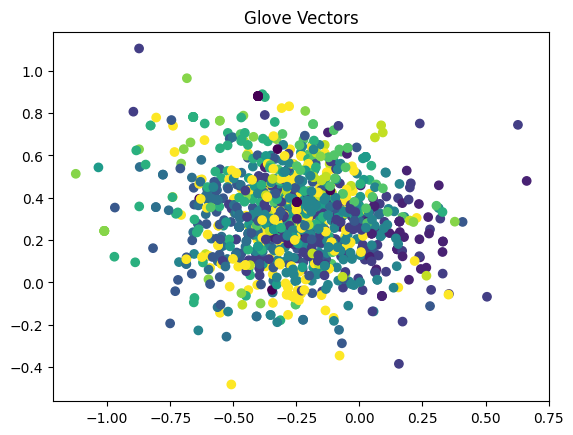

In [297]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming glove_vector and word_vectors are NumPy arrays
# Replace these with your actual data
glove_vector = sentence_vectors

# Function to fit the model and plot results
def fit_and_plot(data, title):
    best_gmm = None
    best_score = float('-inf')
    for n_components in range(3, 13):
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
        gmm.fit(data)
        score = gmm.bic(data)
        if score > best_score:
            best_score = score
            best_gmm = gmm

    print(f'Best GMM for {title}: {best_gmm}')
    print(f'Summary: Means - {best_gmm.means_}, Covariances - {best_gmm.covariances_}')

    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=best_gmm.predict(data))
    plt.title(title)
    plt.show()

# Fit and plot for glove_vector and word_vectors
fit_and_plot(glove_vector, 'Glove Vectors')



Best GMM for Glove Vectors: GaussianMixture(n_components=4, random_state=0)
Summary: Means - [[-3.04669515e-01  5.30655939e-01 -2.71007576e-01  3.21033333e-03
  -1.84204394e-01 -9.78047121e-01  3.42330333e-01 -4.79408939e-01
   2.51188939e-01  2.24971970e-01  7.10707424e-02 -8.06251652e-01
   3.71807273e-01  3.01533788e-01  5.63976970e-01  7.21069697e-02
   2.98802955e-01  7.80354909e-02  4.52259697e-01  1.37699091e-01
   8.16130788e-01 -2.41373439e-01  1.59959576e-01 -2.43138197e-01
   5.44626364e-01 -1.67309303e-01 -4.48825364e-01 -5.94863758e-01
  -1.00853347e+00 -1.97126818e-01  8.11334379e-02 -6.59979727e-01
  -2.75873182e-02 -4.64188091e-01  5.08724697e-01  5.15867591e-01
   4.45314091e-01 -1.13643121e-01  1.72979248e-01 -5.78377879e-02
   4.79568788e-01 -1.91738500e-01  7.49919742e-01 -2.16984000e-01
  -7.07778333e-02 -5.44559545e-01  2.21569333e-01  2.71268182e-01
   1.90948485e-01 -9.23787318e-01  1.97782076e-01 -1.55420545e-01
   2.10321212e-01 -2.56363636e-02  4.91529818e-01

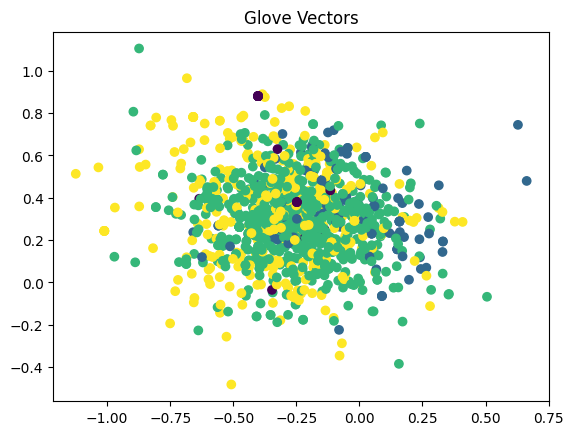

In [298]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming glove_vector and word_vectors are NumPy arrays
# Replace these with your actual data
glove_vector = sentence_vectors

# Function to fit the model and plot results
def fit_and_plot(data, title):
    best_gmm = None
    best_score = float('-inf')
    for n_components in range(3, 7):
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
        gmm.fit(data)
        score = gmm.bic(data)
        if score > best_score:
            best_score = score
            best_gmm = gmm

    print(f'Best GMM for {title}: {best_gmm}')
    print(f'Summary: Means - {best_gmm.means_}, Covariances - {best_gmm.covariances_}')

    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=best_gmm.predict(data))
    plt.title(title)
    plt.show()

# Fit and plot for glove_vector and word_vectors
fit_and_plot(glove_vector, 'Glove Vectors')

